In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [12]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
%%time
path = 'models/linear_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 129)               2709      
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 999us/step - loss: 5.0593 - accuracy: 0.0157 - val_loss: 4.8690 - val_accuracy: 0.0221
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models/linear_class_pca/assets


INFO:tensorflow:Assets written to: models/linear_class_pca/assets


CPU times: user 19min 49s, sys: 2min 8s, total: 21min 57s
Wall time: 12min 4s


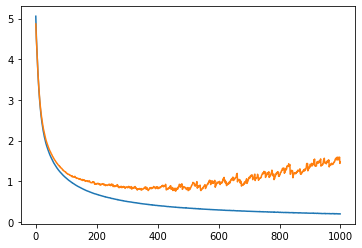

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [16]:
pred = model.predict(X_test)

<h3>Components from PCA</h3>

In [17]:
pca.n_components_

20

<h3>Classification Report</h3>

In [18]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       1.00      0.89      0.94        18
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       0.65      0.55      0.59        20
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          10       0.43      1.00      0.61        23
          11       1.00      0.94      0.97        17
          12       1.00      0.81      0.90        16
          13       0.97      1.00      0.98        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

<h1>Exponential Damage</h1>

In [19]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [21]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
%%time
path = 'models/exp_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                400       
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 129)               2709      
                                                                 
Total params: 3,949
Trainable params: 3,949
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 5.0451 - accuracy: 0.0205 - val_loss: 4.9195 - val_accuracy: 0.0244
Epoch 2/1000
726/726 [==================

INFO:tensorflow:Assets written to: models/exp_class_pca/assets


INFO:tensorflow:Assets written to: models/exp_class_pca/assets


CPU times: user 21min 6s, sys: 2min 37s, total: 23min 43s
Wall time: 12min 39s


In [24]:
pred = model.predict(X_test)

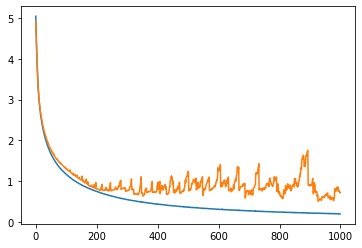

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Components from PCA</h3>

In [26]:
pca.n_components_

19

<h3>Classification Report</h3>

In [27]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.89      0.94        18
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       0.43      1.00      0.60        20
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          10       0.75      0.39      0.51        23
          11       1.00      0.94      0.97        17
          12       1.00      0.81      0.90        16
          13       0.94      1.00      0.97        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       0.94    

<h1>Sigmoid-like Damage</h1>

In [28]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [30]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [36]:
%%time
path = 'models/sig_class_pca'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(int(pca.n_components_))))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                1200      
                                                                 
 dense_25 (Dense)            (None, 80)                6480      
                                                                 
 dense_26 (Dense)            (None, 80)                6480      
                                                                 
 dense_27 (Dense)            (None, 129)               10449     
                                                                 
Total params: 24,609
Trainable params: 24,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 1s 1ms/step - loss: 5.1007 - accuracy: 0.0175 - val_loss: 4.7298 - val_accuracy: 0.0275
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models/sig_class_pca/assets


INFO:tensorflow:Assets written to: models/sig_class_pca/assets


CPU times: user 25min 59s, sys: 3min 35s, total: 29min 34s
Wall time: 14min 42s


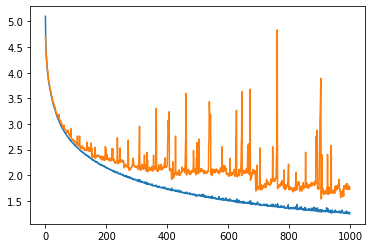

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [38]:
pred = model.predict(X_test)

<h3>Components from PCA</h3>

In [39]:
pca.n_components_

14

<h3>Classification Report</h3>

In [40]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.39      0.33      0.36        21
           1       1.00      0.78      0.88        18
           2       1.00      0.74      0.85        23
           3       0.95      0.95      0.95        20
           4       0.77      0.74      0.76        23
           5       0.41      0.45      0.43        20
           6       0.80      0.70      0.74        23
           7       1.00      0.80      0.89        25
           8       1.00      0.80      0.89        25
           9       0.71      0.77      0.74        13
          10       0.22      0.48      0.31        23
          11       0.87      0.76      0.81        17
          12       0.60      0.56      0.58        16
          13       0.96      0.71      0.81        31
          14       0.91      0.70      0.79        30
          15       1.00      0.95      0.97        19
          16       1.00      0.64      0.78        25
          17       0.77    